In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
tf.__version__

'1.4.0'

In [ ]:
def graph(w_number, x_number, step_number):
    y = 1
    yprime = 0
    x = tf.Variable(tf.random_normal([x_number]), name = 'x')
    
    for i in range(1, w_number + 1):
        globals()['w{}'.format(i)] = tf.Variable(tf.random_normal([1]), name = 'weight{}'.format(i))
        y += globals()['w{}'.format(i)]*(x**i)  # y = 1 + w1*(x) + w2*(x**2) + w3*(x**3) + w4*(x**4) + w5*(x**5) + w6*(x**6)
        yprime += i*globals()['w{}'.format(i)]*(x**(i-1))  # yprime = w1 + 2*w2*x + 3*w3*(x**2) + 4*w4*(x**3) + 5*w5*(x**4) + 6*w6*(x**5)
    
    cost = tf.reduce_mean(tf.square(yprime - y))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1e-5)
    train = optimizer.minimize(cost)
    
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())
    
    for step in range(step_number + 1):
        for i in range(1, w_number + 1):
            globals()['w{}_val'.format(i)] = sess.run([globals()['w{}'.format(i)]])
        cost_val, yprime_val, y_val, x_val, _ = sess.run([cost, yprime, y, x, train])
        if step % int(step_number / 5) == 0:
    #         print(step, "Cost: ", cost_val, "\nx: ", x_val,  "yprime: ", yprime_val, "y: ", y_val)
            print(step, "Cost: ", cost_val, "\n")
            print("w1: ", w1_val, "w2: ", w2_val, "w3: ", w3_val, "w4: ", w4_val, "w5: ", w5_val, "w6: ", w6_val, "\n")
            
    def y(x):
        answer = 1
        for i in range(1, w_number + 1):
            answer += globals()['w{}_val'.format(i)]*(x**i)
        return answer[0]
    
    globals()['w{}x{}'.format(w_number, x_number)] = [x_val, y(x_val)]
    plt.plot(x_val, y(x_val), '.')
    plt.show()

0 Cost:  9191.391 

w1:  [array([-0.72676325], dtype=float32)] w2:  [array([0.32074443], dtype=float32)] w3:  [array([0.28441238], dtype=float32)] w4:  [array([-0.7433455], dtype=float32)] w5:  [array([-0.37139085], dtype=float32)] w6:  [array([0.7430384], dtype=float32)] 

6000 Cost:  2.0026758 

w1:  [array([-0.6540626], dtype=float32)] w2:  [array([0.3927884], dtype=float32)] w3:  [array([0.40081298], dtype=float32)] w4:  [array([-0.3565301], dtype=float32)] w5:  [array([-0.06474543], dtype=float32)] w6:  [array([0.04368989], dtype=float32)] 

12000 Cost:  1.3473178 

w1:  [array([-0.5468038], dtype=float32)] w2:  [array([0.37701944], dtype=float32)] w3:  [array([0.47908893], dtype=float32)] w4:  [array([-0.22051175], dtype=float32)] w5:  [array([-0.05679346], dtype=float32)] w6:  [array([0.03028223], dtype=float32)] 

18000 Cost:  1.0632786 

w1:  [array([-0.4483399], dtype=float32)] w2:  [array([0.3529752], dtype=float32)] w3:  [array([0.52589697], dtype=float32)] w4:  [array([-0.

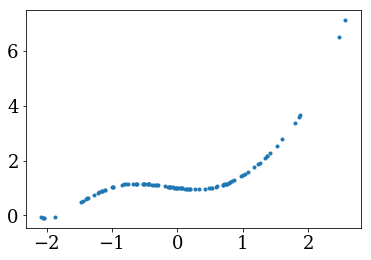

In [ ]:
graph(6, 100, 30000)

0 Cost:  171850.28 

w1:  [array([-3.189711], dtype=float32)] w2:  [array([0.13546804], dtype=float32)] w3:  [array([1.0863686], dtype=float32)] w4:  [array([1.3920088], dtype=float32)] w5:  [array([1.0606041], dtype=float32)] w6:  [array([-2.579457], dtype=float32)] 

6000 Cost:  8.222584 

w1:  [array([-2.7050903], dtype=float32)] w2:  [array([-0.3812338], dtype=float32)] w3:  [array([1.1907239], dtype=float32)] w4:  [array([0.29417518], dtype=float32)] w5:  [array([-0.09017897], dtype=float32)] w6:  [array([-0.02616009], dtype=float32)] 

12000 Cost:  5.2424316 

w1:  [array([-2.4662552], dtype=float32)] w2:  [array([-0.50578976], dtype=float32)] w3:  [array([1.2113156], dtype=float32)] w4:  [array([0.01505555], dtype=float32)] w5:  [array([-0.14418714], dtype=float32)] w6:  [array([0.01332845], dtype=float32)] 

18000 Cost:  4.629617 

w1:  [array([-2.293383], dtype=float32)] w2:  [array([-0.53164285], dtype=float32)] w3:  [array([1.1789285], dtype=float32)] w4:  [array([-0.0351704

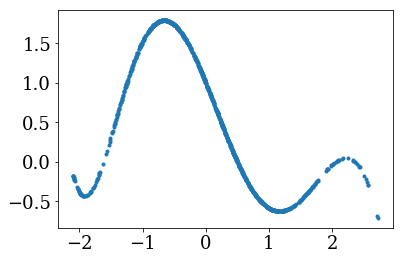

In [ ]:
graph(6, 1000, 30000)

0 Cost:  3524.8215 

w1:  [array([0.3738627], dtype=float32)] w2:  [array([0.35528964], dtype=float32)] w3:  [array([0.8828763], dtype=float32)] w4:  [array([-0.9923401], dtype=float32)] w5:  [array([1.3019189], dtype=float32)] w6:  [array([0.43725964], dtype=float32)] 

6000 Cost:  0.4571418 

w1:  [array([0.33245304], dtype=float32)] w2:  [array([0.5411629], dtype=float32)] w3:  [array([0.38262394], dtype=float32)] w4:  [array([0.04003801], dtype=float32)] w5:  [array([-0.00487726], dtype=float32)] w6:  [array([0.00071349], dtype=float32)] 

12000 Cost:  0.34902287 

w1:  [array([0.3873854], dtype=float32)] w2:  [array([0.5048929], dtype=float32)] w3:  [array([0.3368017], dtype=float32)] w4:  [array([0.03772557], dtype=float32)] w5:  [array([-0.00230195], dtype=float32)] w6:  [array([0.00090812], dtype=float32)] 

18000 Cost:  0.27145398 

w1:  [array([0.4377496], dtype=float32)] w2:  [array([0.47350842], dtype=float32)] w3:  [array([0.3035636], dtype=float32)] w4:  [array([0.0381817

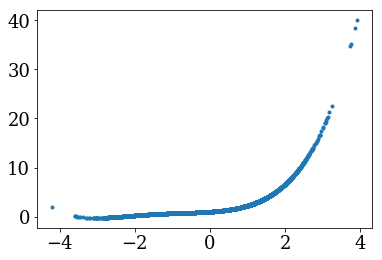

In [ ]:
graph(6, 10000, 30000)

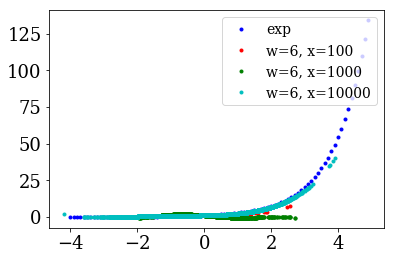

In [ ]:
x = np.array([i for i in range(-40, 50, 1)])
plt.plot(0.1*x, np.exp(0.1*x), '.b', label = 'exp')
plt.plot(w6x100[0],w6x100[1], '.r', label = 'w=6, x=100')
plt.plot(w6x1000[0],w6x1000[1], '.g', label = 'w=6, x=1000')
plt.plot(w6x10000[0],w6x10000[1], '.c', label = 'w=6, x=10000')
plt.legend(loc = 'upper right', fontsize = 'xx-small')

plt.show()